# Sentiment Analysis with LSTMs

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Embedding

from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

from sklearn.metrics import confusion_matrix

## Data Exploration

In [3]:
training_set, testing_set = imdb.load_data(index_from=3)
x_train, y_train = training_set
y_test, y_test = testing_set

17465344/17464789 [==============================] - 35s 2us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
c:\users\rebs\documents\dev\data-science-env\env\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
c:\users\rebs\documents\dev\data-science-env\env\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) i

In [4]:
print(x_train[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [87]:
word_to_id = imdb.get_word_index()
word_to_id = {key: (value + 3) for key, value in word_to_id.items()}
word_to_id['<PAD>'] = 0
word_to_id['<START>'] = 1
id_to_word = {value: key for key, value in word_to_id.items()}

In [90]:
print(' '.join(id_to_word[id] for id in x_train[159]))
print(y_train[159])

<START> a rating of 1 does not begin to express how dull depressing and relentlessly bad this movie is
0


In [9]:
print(' '.join(id_to_word[id] for id in x_train[6]))
print(y_train[6])

<START> lavish production values and solid performances in this straightforward adaption of jane austen's satirical classic about the marriage game within and between the classes in provincial 18th century england northam and paltrow are a salutory mixture as friends who must pass through jealousies and lies to discover that they love each other good humor is a sustaining virtue which goes a long way towards explaining the accessability of the aged source material which has been toned down a bit in its harsh scepticism i liked the look of the film and how shots were set up and i thought it didn't rely too much on successions of head shots like most other films of the 80s and 90s do very good results
1


## Preprocessing

In [10]:
training_set, testing_set = imdb.load_data(num_words=10000)
x_train, y_train = training_set
x_test, y_test = testing_set

In [11]:
print(f'Number of training samples: {x_train.shape[0]}')
print(f'Number of testing samples: {x_test.shape[0]}')

Number of training samples: 25000
Number of testing samples: 25000


In [13]:
x_train_padded = sequence.pad_sequences(x_train, maxlen=100)
x_test_padded = sequence.pad_sequences(x_test, maxlen=100)

In [14]:
print(f'x_train vector shape: {x_train_padded.shape}')
print(f'x_test vector shape: {x_test_padded.shape}')

x_train vector shape: (25000, 100)
x_test vector shape: (25000, 100)


## Modeling

In [45]:
model = Sequential()

In [46]:
model.add(Embedding(input_dim=10000, output_dim=128))
model.add(LSTM(units=128))
model.add(Dense(units=1, activation='sigmoid'))

In [47]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 128)         1280000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 1,411,713
Trainable params: 1,411,713
Non-trainable params: 0
_________________________________________________________________


In [48]:
model.compile(loss='binary_crossentropy', optimizer='RMSprop', metrics=['accuracy'])

In [49]:
scores = model.fit(x=x_train_padded, y=y_train, batch_size=128, epochs=10, validation_data=(x_test_padded, y_test))

Epoch 1/10
196/196 [==============================] - 46s 228ms/step - loss: 0.4639 - accuracy: 0.7835 - val_loss: 0.6311 - val_accuracy: 0.7696
Epoch 2/10
196/196 [==============================] - 58s 298ms/step - loss: 0.3064 - accuracy: 0.8762 - val_loss: 0.3316 - val_accuracy: 0.8566
Epoch 3/10
196/196 [==============================] - 62s 314ms/step - loss: 0.2602 - accuracy: 0.8968 - val_loss: 0.5078 - val_accuracy: 0.8114
Epoch 4/10
196/196 [==============================] - 54s 277ms/step - loss: 0.2270 - accuracy: 0.9122 - val_loss: 0.3998 - val_accuracy: 0.8303
Epoch 5/10
196/196 [==============================] - 58s 297ms/step - loss: 0.1975 - accuracy: 0.9242 - val_loss: 0.3867 - val_accuracy: 0.8511
Epoch 6/10
196/196 [==============================] - 57s 291ms/step - loss: 0.1747 - accuracy: 0.9371 - val_loss: 0.3613 - val_accuracy: 0.8469
Epoch 7/10
196/196 [==============================] - 57s 290ms/step - loss: 0.1495 - accuracy: 0.9456 - val_loss: 0.4440 - val_ac

## Results

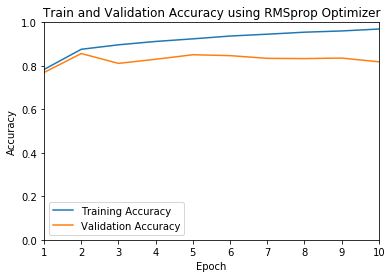

In [50]:
plt.plot(range(1, 11), scores.history['accuracy'], label='Training Accuracy')
plt.plot(range(1, 11), scores.history['val_accuracy'], label='Validation Accuracy')
plt.axis([1, 10, 0, 1])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Train and Validation Accuracy using RMSprop Optimizer')
plt.legend()
plt.show()

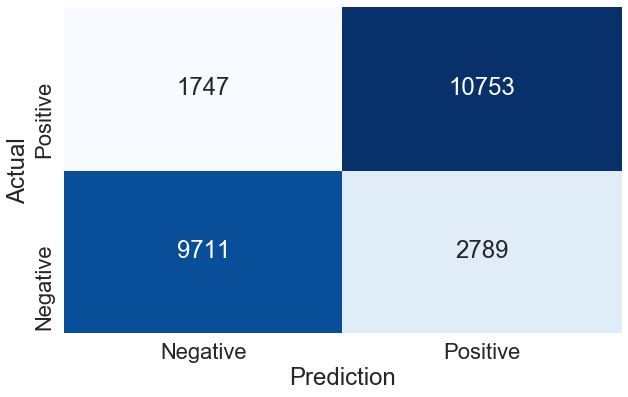

In [73]:
plt.figure(figsize=(10,6))
y_test_pred = model.predict_classes(x_test_padded)
c_matrix = confusion_matrix(y_test, y_test_pred)
ax = sns.heatmap(c_matrix, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], cbar=False, cmap='Blues', fmt='g')
ax.set_ylim([0,2])
ax.set_xlabel('Prediction')
ax.set_ylabel('Actual')
plt.show()

In [205]:
false_negatives = []
false_positives = []

for i in range(len(y_test_pred)):
    if y_test_pred[i][0] != y_test[i]:
        if y_test[i] == 0:
            false_positives.append(i)
        else:
            false_negatives.append(i)

In [163]:
false_positives[21]

299

In [95]:
x_test_padded[19120]

array([4187,  750,  935,   49,    7,    4,   65,  791,   43,   92,   97,
        281,  305,    7,  582,  125,   17, 4327,   42,   52,    4, 1721,
       6317, 1272, 3504,  186,   40,    6,    2,    6,   55,  619,    5,
       1499,    2,  138,    9,   59,   11,  119,   19,   14,  132,  244,
         13, 1012,  142,   10,   10,   38,   61, 5492,    9,   15,   48,
         25,   26, 9516,   11,  119,   19,    2,   40,   72,   95,   34,
         32,  817,  106,   12,   21,   48,   25,  713,    6, 1295,  337,
         14,   22,  238,   81,  164,    8, 2522,   25,   15,   14,  405,
         22,    9,  530,   88,    4,   65,    9,   38, 2087, 3650,    5,
       1967])

In [301]:
print(' '.join(id_to_word[id] for id in x_test[1931]))
print(y_test[1931])
print(y_test_pred[1931][0])

<START> if you like bad movies and you must to watch this one here's a good one not quite as funny as the first but much lower quality a must see for fans of jack frost as well as anyone up for a good laugh at the writing
0
1


In [288]:
false_negatives[77]

1146

In [295]:
print(' '.join(id_to_word[id] for id in x_test[2765]))
print(y_test[2765])
print(y_test_pred[2765][0])

<START> contains spoiler the movie is a good action comedy but i don't know if the director cut too many parts but it seems that the bad guy die too fast the end of the movie come the bad guy dies and that's it br br the special effects are good and i don't regret paying to see it at the theatre
1
0


In [296]:
succeed = False
for i in false_positives:
    try:
        print(' '.join(id_to_word[id] for id in x_test[i]))
        print(i)
    except:
        continue

<START> well i'd have to say that i do own this film and i only like the ending the movie is boring and slow but the final fight is so funny lets just say that if the fake bird didn't attack the main evil guy this movie would be a 0 out of 10 the bird though makes it a 3 if you are truly bored or want something terrible to watch rent this and fast forward to the final battle
86
<START> more suspenseful more subtle much much more disturbing
256
<START> this film gives a look at the suffering a family experiences at the death of a child and the healing that can finally come to them br br the family learns of the death of their son on christmas eve 1991 ruining the christmas season for them they do not celebrate it again for many years there is an interesting comment by the daughter that will remind viewers to consider the needs of surviving children in such a situation br br the matthew character makes a reference to jesus but i suspect that other comments he makes come from non christia